In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import helpers.processing_helpers as ph
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import StandardScaler

In [2]:
df_dev = pd.read_csv("./dataset/development.csv")

In [3]:
noise_indexes = [0,7,12,15,16,17]
acc_idxs = [1,2,3,4,5,6,8,9,10,11,13,14]
features = ["pmax", "negpmax", 'area', 'tmax', 'rms']

sensors_removed = df_dev.drop(columns=ph.get_column_names(features, noise_indexes))
sensors_removed = sensors_removed.drop(columns=ph.get_column_names(['tmax', 'rms', 'area'], acc_idxs))

In [4]:
y_train_valid = sensors_removed[['x', 'y']].copy()

X_train_valid = sensors_removed.drop(columns=['x', 'y'])

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, shuffle=True, random_state=42, stratify=y_train_valid)

In [5]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

In [6]:
mlp = MLPRegressor(learning_rate_init=0.01, max_iter=1000, n_iter_no_change=50, verbose=1, hidden_layer_sizes=(200), activation='logistic')
mlp.fit(X_train, y_train)

Iteration 1, loss = 7741.16775955
Iteration 2, loss = 141.31115697
Iteration 3, loss = 32.79685630
Iteration 4, loss = 20.67811302
Iteration 5, loss = 16.18851478
Iteration 6, loss = 13.75208953
Iteration 7, loss = 12.26811647
Iteration 8, loss = 11.32137304
Iteration 9, loss = 10.63898231
Iteration 10, loss = 10.09839418
Iteration 11, loss = 9.86635593
Iteration 12, loss = 9.53805795
Iteration 13, loss = 9.26867966
Iteration 14, loss = 9.12825863
Iteration 15, loss = 8.91578125
Iteration 16, loss = 8.80601748
Iteration 17, loss = 8.69131261
Iteration 18, loss = 8.60680726
Iteration 19, loss = 8.50896548
Iteration 20, loss = 8.43225081
Iteration 21, loss = 8.39673907
Iteration 22, loss = 8.34612686
Iteration 23, loss = 8.27348795
Iteration 24, loss = 8.25599309
Iteration 25, loss = 8.19007633
Iteration 26, loss = 8.16967705
Iteration 27, loss = 8.09142232
Iteration 28, loss = 8.02710653
Iteration 29, loss = 8.03680855
Iteration 30, loss = 8.00131071
Iteration 31, loss = 7.99022584
Iter

c:\Users\Arist\OneDrive\Skrivebord\DSL labs\DSL_project2\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(activation='logistic', hidden_layer_sizes=200,
             learning_rate_init=0.01, max_iter=1000, n_iter_no_change=50,
             verbose=1)

In [7]:
y_pred = mlp.predict(X_valid)
ph.mean_euclid_dist(y_valid, y_pred)

4.498578559170036

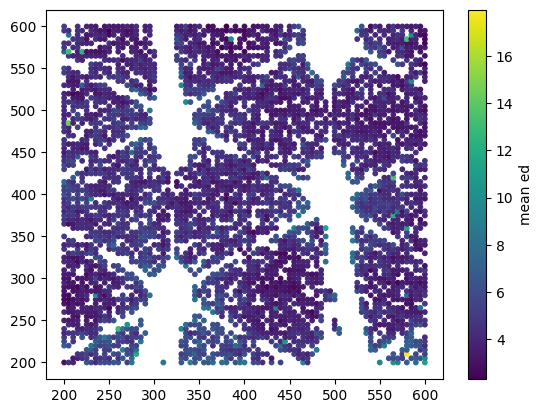

In [8]:
ph.create_acc_map(y_valid, y_pred)